# Load Data

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
file_path = "/content/corpus 1 (1).csv"  #use the right path

df = pd.read_csv(file_path)

print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/corpus 1 (1).csv'

In [ ]:
print(len(df))

# EDA Description short length

**Histogram**

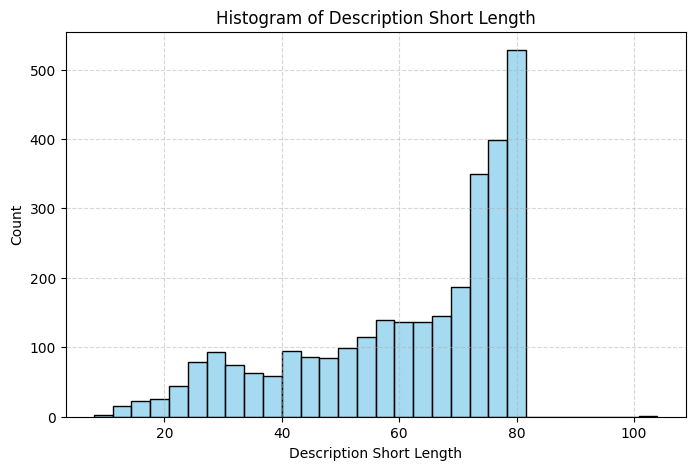

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(
    df['description_short_length'],
    bins=30,
    color='skyblue',
    edgecolor='black'
)

plt.title("Histogram of Description Short Length")
plt.xlabel("Description Short Length")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

***Comment on EDA Histogram**


*   Maximum short length is 80 -> This could be the target (length limit) for the multi agent system


*   There are an outlier with length above 100






**Density**

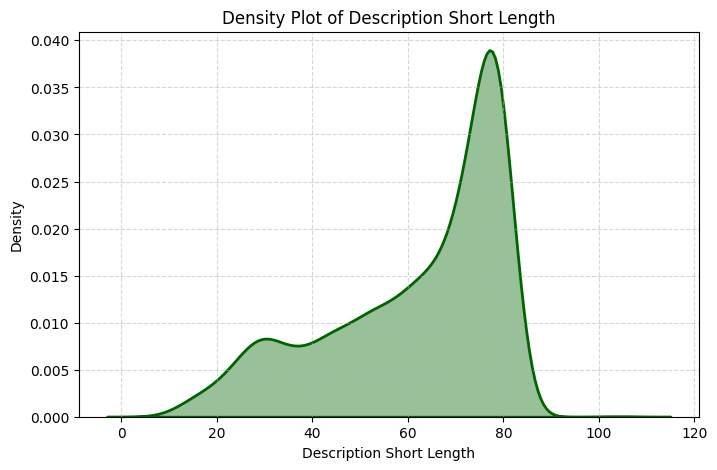

In [ ]:

plt.figure(figsize=(8, 5))
sns.kdeplot(
    df['description_short_length'],
    color='darkgreen',
    linewidth=2,
    fill=True,
    alpha=0.4
)

plt.title("Density Plot of Description Short Length")
plt.xlabel("Description Short Length")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

***Comment on EDA Density***


*   Most description short are around 40 to 80
-> This can be our system target range




# EDA Description html length

**Histogram**

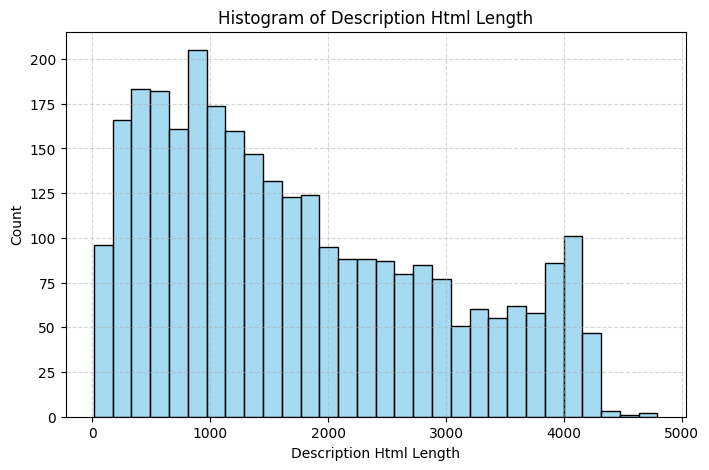

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(
    df['description_html_length'],
    bins=30,
    color='skyblue',
    edgecolor='black'
)

plt.title("Histogram of Description Html Length")
plt.xlabel("Description Html Length")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

***Comment on EDA Histogram***


*   Most of the description HTML length are below 3000 length
*   A few outliers are nearly 5000 long -> However we should keep as experimental examples to test if our system can handle exceptionally long cases and meets the target length range and expected semantic.



**Density**

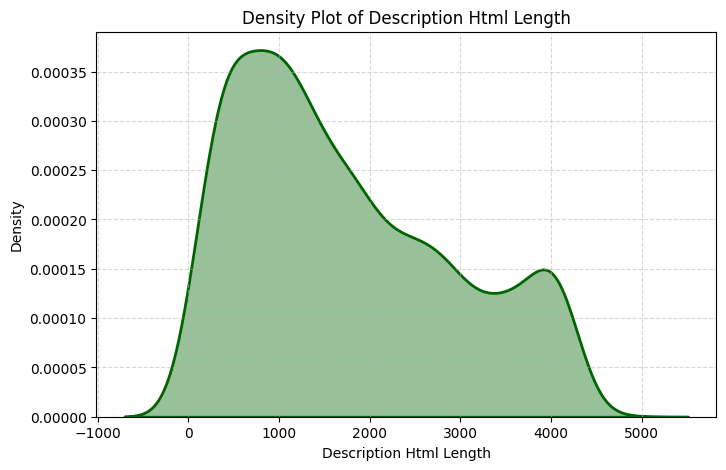

In [ ]:

plt.figure(figsize=(8, 5))
sns.kdeplot(
    df['description_html_length'],
    color='darkgreen',
    linewidth=2,
    fill=True,
    alpha=0.4
)

plt.title("Density Plot of Description Html Length")
plt.xlabel("Description Html Length")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

***Comment on EDA Density***


*   Most html length are around 1000 to 3000




# EDA Description short length and html length

**Scatter plot**

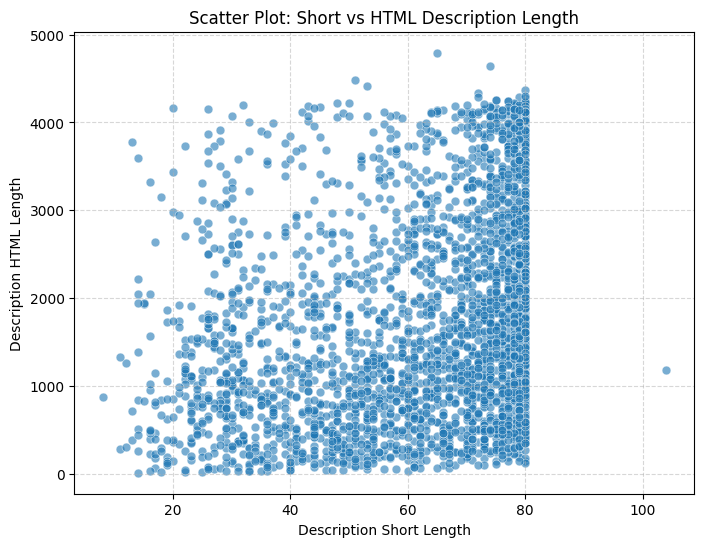

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='description_short_length',
    y='description_html_length',
    data=df,
    s=40,
    alpha=0.6
)

plt.title("Scatter Plot: Short vs HTML Description Length")
plt.xlabel("Description Short Length")
plt.ylabel("Description HTML Length")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

***Comment on EDA Scatter plot***



*   There is an outlier that needs to be remove (description short length over 100)




**Box plot for means and outliers**

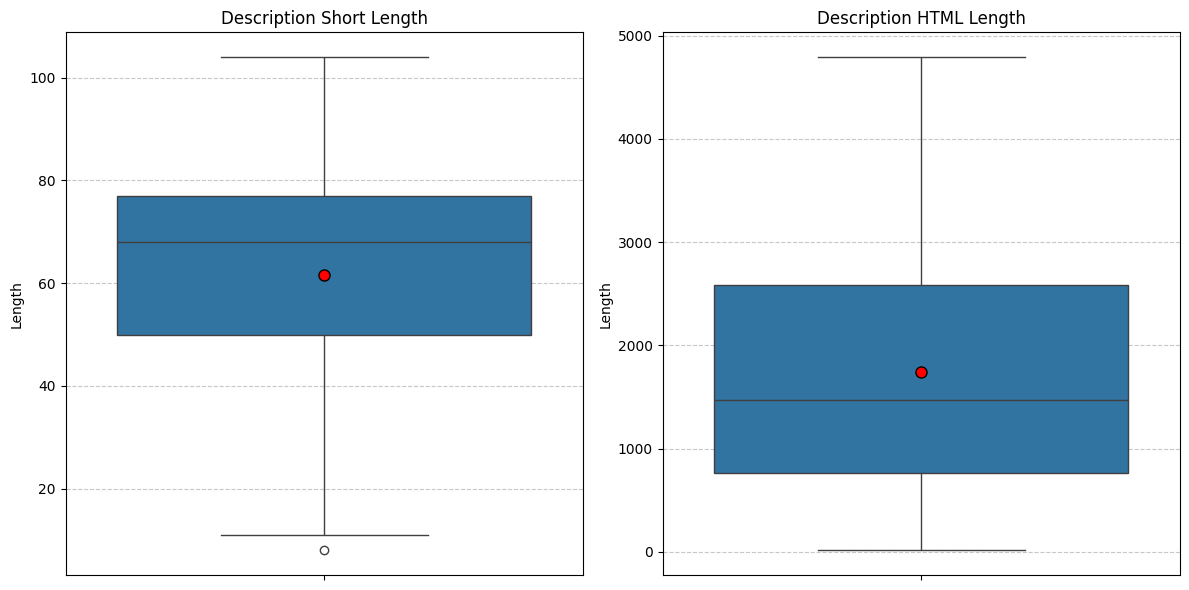

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot cho description_short_length
sns.boxplot(y=df['description_short_length'], ax=axes[0], showmeans=True, meanprops={
    "marker": "o",
    "markerfacecolor": "red",
    "markeredgecolor": "black",
    "markersize": 8
})
axes[0].set_title("Description Short Length")
axes[0].set_ylabel("Length")
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)

# Box plot cho description_html_length
sns.boxplot(y=df['description_html_length'], ax=axes[1], showmeans=True, meanprops={
    "marker": "o",
    "markerfacecolor": "red",
    "markeredgecolor": "black",
    "markersize": 8
})
axes[1].set_title("Description HTML Length")
axes[1].set_ylabel("Length")
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# EDA cosine similarity Description short and html

**Histogram**

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/94 [00:00<?, ?it/s]

Batches:   0%|          | 0/94 [00:00<?, ?it/s]

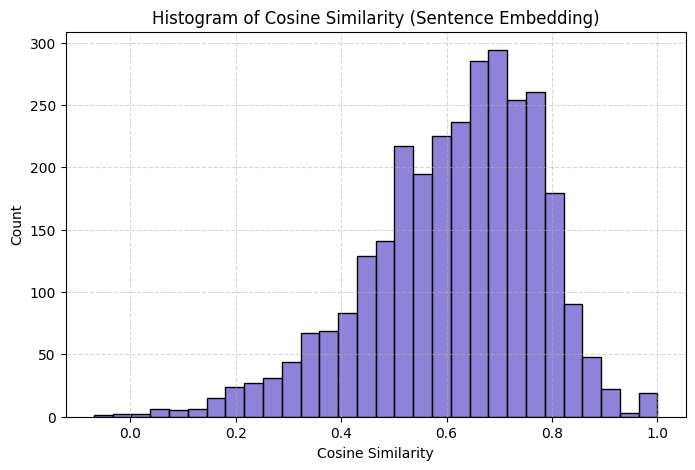

In [ ]:
df[['description_short', 'description_html_clean']] = df[['description_short', 'description_html_clean']].fillna('')

# Load model sentence embedding
model = SentenceTransformer('all-MiniLM-L6-v2')

# Pair texts
short_texts = df['description_short'].tolist()
html_texts = df['description_html_clean'].tolist()

# Embed texts
emb_short = model.encode(short_texts, convert_to_tensor=True, show_progress_bar=True)
emb_html  = model.encode(html_texts, convert_to_tensor=True, show_progress_bar=True)

# Cosine similarity for each pair
cos_sim = cosine_similarity(emb_short.cpu().numpy(), emb_html.cpu().numpy())
similarity_scores = np.diag(cos_sim)

df['cosine_similarity_embed'] = similarity_scores


plt.figure(figsize=(8, 5))
sns.histplot(df['cosine_similarity_embed'], bins=30, color='slateblue', edgecolor='black')

plt.title("Histogram of Cosine Similarity (Sentence Embedding)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

***Comment on EDA Histogram***


*   Most cases (compare semantic meaning description short and description html) have cosine similarity of 0.6 and above (0.6 indicates description short is related to description html in some sense (though not strong))
This similarity score is somewhat acceptable since the score is based on the embedding model  



*   **However, a lot of instances have scores 0.5 and below. This raises futher investigation on these cases and adjust description short if needed**







**Correlation Between Length Difference and Cosine Similarity**

Pearson co-efficient: 0.0123


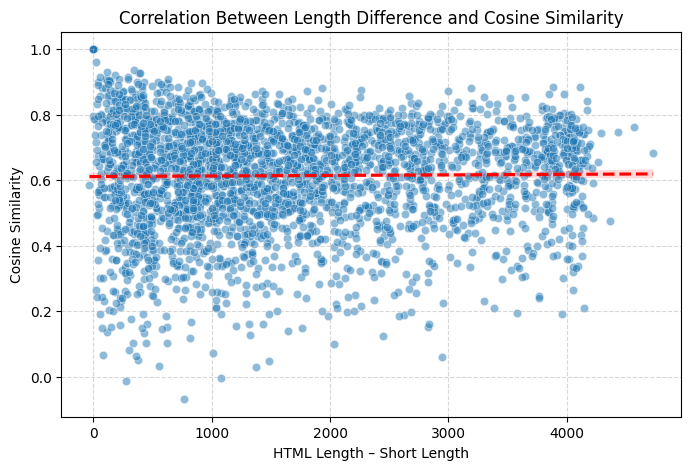

In [ ]:

df['length_diff'] = df['description_html_length'] - df['description_short_length']

corr = df[['length_diff', 'cosine_similarity_embed']].corr().iloc[0, 1]
print(f"Pearson co-efficient: {corr:.4f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='length_diff',
    y='cosine_similarity_embed',
    data=df,
    alpha=0.5
)
sns.regplot(
    x='length_diff',
    y='cosine_similarity_embed',
    data=df,
    scatter=False,
    color='red',
    line_kws={'linestyle': '--'}
)

plt.title("Correlation Between Length Difference and Cosine Similarity")
plt.xlabel("HTML Length – Short Length")
plt.ylabel("Cosine Similarity")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

***Comment on EDA Scatter plot***


*   Most data have the similarity score over 0.6. This indicates that the limitation of description length to 80 does not effect or has very little effect to correlation between description short and description html. -> The "80" threshold is acceptable and doesn't require changing.
*  **However, a lot of instances have scores 0.5 and below. This raises futher investigation on these cases and adjust description short if needed**



# **Instances that need cleaning or revisit**

**Instance with exceptionally long description short length**

In [ ]:

long_instances = df[df['description_short_length'] > 100]

print(long_instances[['description_short_length', 'description_short', 'description_html_clean']])
long_instances.to_csv("long_description_instances.csv", index=False)

      description_short_length  \
1012                       104   

                                      description_short  \
1012  Bouquet is a specialized application for selli...   

                                 description_html_clean  
1012  بوكيه هو تطبيق متخصص لبيع الزهور وإعداد باقات ...  


**Instances with low cosine similarity**

In [ ]:
low_sim_df = df[df['cosine_similarity_embed'] <= 0.5 or df['cosine_similarity_embed'] == 1.0 ]
low_sim_df.to_csv("low_similarity_instances.csv", index=False)

***filtered_data***

In [ ]:

filtered_df = df[
    (df['cosine_similarity_embed'] > 0.5) &
    (df['description_short_length'] < 80)
    &(df['cosine_similarity_embed'] < 0.99)
]

filtered_df.to_csv("high_sim_short_description_with_no_outlier.csv", index=False)

print(f"Số dòng thỏa điều kiện: {len(filtered_df)}")

Số dòng thỏa điều kiện: 2038


# Keep instance with score over 0.85

In [ ]:
filtered_df = df[
    (df['cosine_similarity_embed'] >= 0.85)
]

filtered_df.to_csv("high_sim_short_description_085_above.csv", index=False)

print(f"Số dòng thỏa điều kiện: {len(filtered_df)}")

# **EDA filtered data**

# Load data

In [ ]:
file_path = "/content/high_sim_short_description_085_above.csv"  #use the right path

df = pd.read_csv(file_path)
print(len(df))

77


# EDA Description short length

***Histogram***

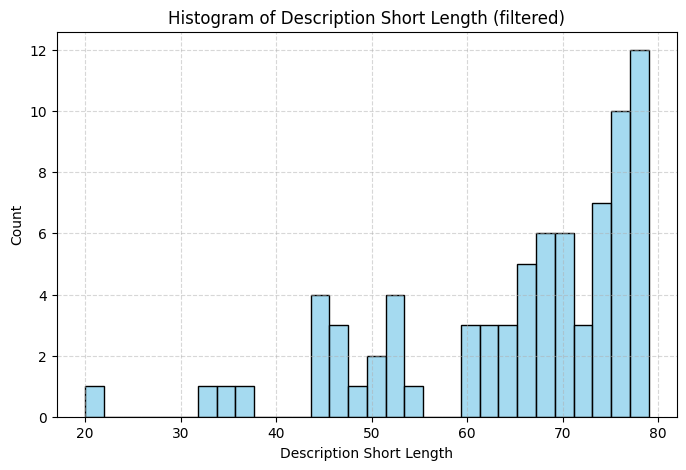

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(
    df['description_short_length'],
    bins=30,
    color='skyblue',
    edgecolor='black'
)

plt.title("Histogram of Description Short Length (filtered)")
plt.xlabel("Description Short Length")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

***Comment on Histogram***


*   This shows right-skewed distribution, with most description lengths clustering between 70–80 characters. Few entries are below 60




# EDA Description html length

***Histogram***

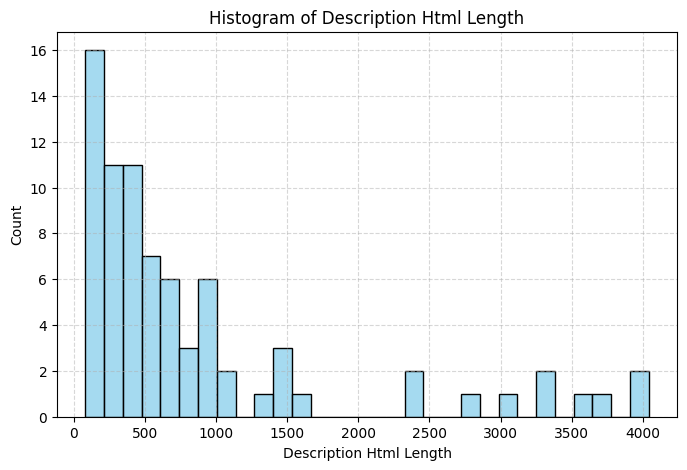

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(
    df['description_html_length'],
    bins=30,
    color='skyblue',
    edgecolor='black'
)

plt.title("Histogram of Description Html Length")
plt.xlabel("Description Html Length")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

***Comment on Histogram***

* Most HTML description lengths under 1000 characters, peaking around 100–300. A few outliers exceed 3000, indicating some very long HTML content.


# EDA Description short length and html length

**Scatter plot**

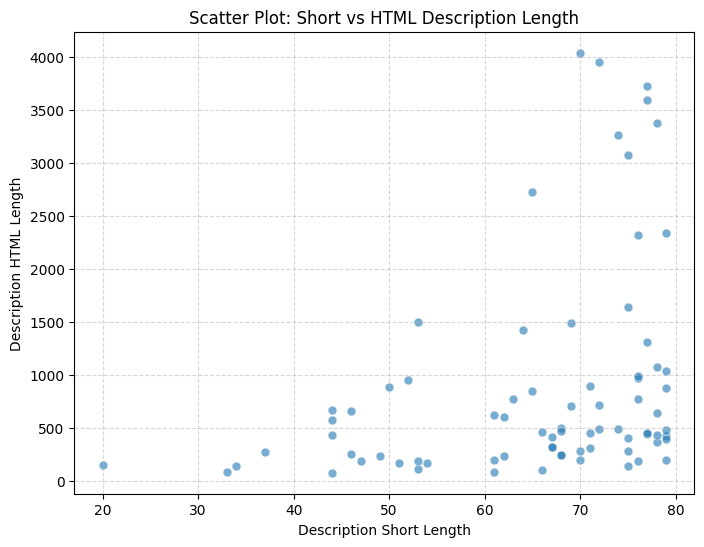

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='description_short_length',
    y='description_html_length',
    data=df,
    s=40,
    alpha=0.6
)

plt.title("Scatter Plot: Short vs HTML Description Length")
plt.xlabel("Description Short Length")
plt.ylabel("Description HTML Length")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

***Comment on Scatter plot***
* Longer short descriptions tend to be associated with longer HTML content.

# EDA cosine similarity Description short and html

***Embedding and calculate cosine similarity***

In [ ]:
df[['description_short', 'description_html_clean']] = df[['description_short', 'description_html_clean']].fillna('')

# Load model sentence embedding
model = SentenceTransformer('all-MiniLM-L6-v2')

# Pair texts
short_texts = df['description_short'].tolist()
html_texts = df['description_html_clean'].tolist()

# Embed texts
emb_short = model.encode(short_texts, convert_to_tensor=True, show_progress_bar=True)
emb_html  = model.encode(html_texts, convert_to_tensor=True, show_progress_bar=True)

# Cosine similarity for each pair
cos_sim = cosine_similarity(emb_short.cpu().numpy(), emb_html.cpu().numpy())
similarity_scores = np.diag(cos_sim)


df['cosine_similarity_embed'] = similarity_scores

**Histogram and pie chart**

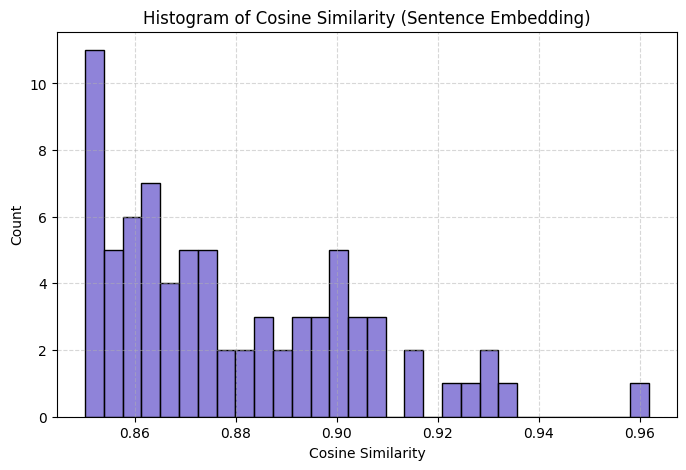

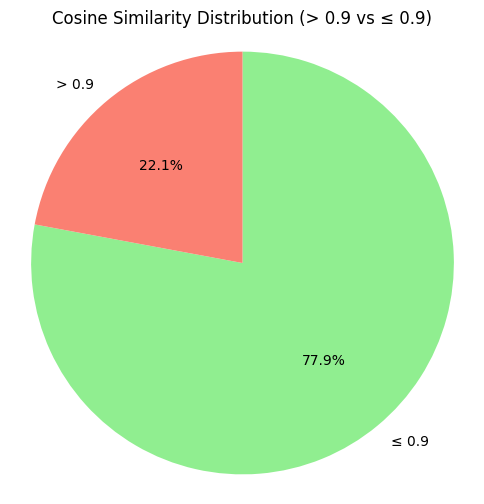

In [ ]:



plt.figure(figsize=(8, 5))
sns.histplot(df['cosine_similarity_embed'], bins=30, color='slateblue', edgecolor='black')

plt.title("Histogram of Cosine Similarity (Sentence Embedding)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
df['similarity_group'] = df['cosine_similarity_embed'].apply(
    lambda x: '> 0.9' if x > 0.9 else '≤ 0.9'
)


group_counts = df['similarity_group'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    group_counts,
    labels=group_counts.index,
    autopct='%1.1f%%',
    colors=['lightgreen', 'salmon'],
    startangle=90,
    counterclock=False
)
plt.title("Cosine Similarity Distribution (> 0.9 vs ≤ 0.9)")
plt.axis('equal')
plt.show()

***Comment about EDA cosine similarity***


*   About 22.1% of the sentence pairs have similarity > 0.9.







***Comments about EDA pie chart***


*   Most of the data (89.1% of 2038) have the cosine similarity score from 0.5 to 0.8 (acceptable range score)



**Scatter plot**

Pearson co-efficient: -0.3276


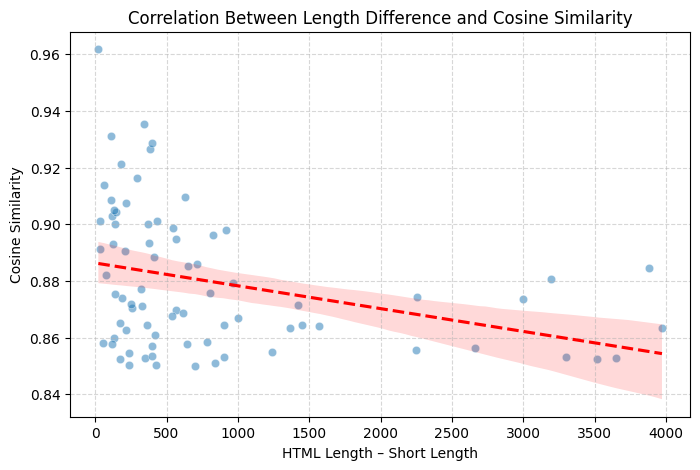

In [ ]:

# Subtracted lenghth
df['length_diff'] = df['description_html_length'] - df['description_short_length']

# Pearson co-efficient
corr = df[['length_diff', 'cosine_similarity_embed']].corr().iloc[0, 1]
print(f"Pearson co-efficient: {corr:.4f}")

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='length_diff',
    y='cosine_similarity_embed',
    data=df,
    alpha=0.5
)
sns.regplot(
    x='length_diff',
    y='cosine_similarity_embed',
    data=df,
    scatter=False,
    color='red',
    line_kws={'linestyle': '--'}
)

plt.title("Correlation Between Length Difference and Cosine Similarity")
plt.xlabel("HTML Length – Short Length")
plt.ylabel("Cosine Similarity")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

***Comment on Scatter plot***

* As the difference between HTML and short text length increases, cosine similarity tends to decrease slightly, suggesting longer HTML expansions may diverge more semantically.

In [ ]:
high_sim_df = df[df['cosine_similarity_embed'] >= 0.9]
print(high_sim_df)

                                                 name  type  star_rating  \
0                                   com.magicbox.kdes    {}     1.400000   
2                            com.kalsefer.android.app    {}     1.560000   
3                     com.cide.interactive.testwebrtc    {}     1.890909   
7                                 com.geekplay.ARCher    {}     2.442857   
9                                 com.ohmibod.remote2    {}     2.925000   
11  com.exlivinapps.mixmegapolappradiogoteborgradi...    {}     2.727273   
12                                com.altarsoft.rebus  GAME     3.680412   
18                          com.spyspotgps.SpySpotGPS    {}     3.892857   
22                          com.y29tv.live.tv.romania    {}     3.444444   
23                                  com.tbcpay.online    {}     3.285714   
40                            com.lilei.wordunlimited  GAME     4.428571   
47                                      io.daibau.pro    {}     4.365854   
48          